# This is Group 12 PDS Final Project / Assignment
### This is a work in progress

### Note for group 12: Import any necessary libraries here

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re 


#There IS an easier way to do this, just not one that i got to run for some reason. 

your_dir = os.getcwd()          # For the sake of getting the path for each group member, its dynamic
datasets = os.path.join(your_dir, "Datasets") # Originally i made it by conjoining a string. Using OS made it work across devices as some have different notation

datasets


'/Users/julia/Desktop/ESADE/python/project/Datasets'

### 1: For each dataset:

 • Print the number of rows and columns
 
 • Display the column names and their data types


In [ ]:
for file in os.listdir(datasets):                       # We loop through the files
    df = pd.read_csv(os.path.join(datasets, file))      # By using path join, we ensure the file can be run in different systems (NOTE: THEORETICAL, please let me know if this works and then delete this note)
    print(f"Information for the file '{file}'")         # Name, for ease of reading
    print(f"Total rows: {df.shape[0]}")                 # N of rows
    print(f"Total columns: {df.shape[1]}")              # N of columns
    print(df.dtypes)                                    # Data types of the files
    print("----------------------------------")         # Small break, to make it less convoluted


Information for the file 'BRK-A.csv'
Total rows: 11227
Total columns: 7
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object
----------------------------------
Information for the file 'DNUT.csv'
Total rows: 815
Total columns: 7
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object
----------------------------------
Information for the file 'DPZ.csv'
Total rows: 5088
Total columns: 7
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object
----------------------------------
Information for the file 'LKNCY.csv'
Total rows: 1350
Total columns: 7
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volum

### 2: Extract all rows where the date is in the year 2023. Print the number of rows and visualize the Close
 price trend for this period

File: BRK-A.csv


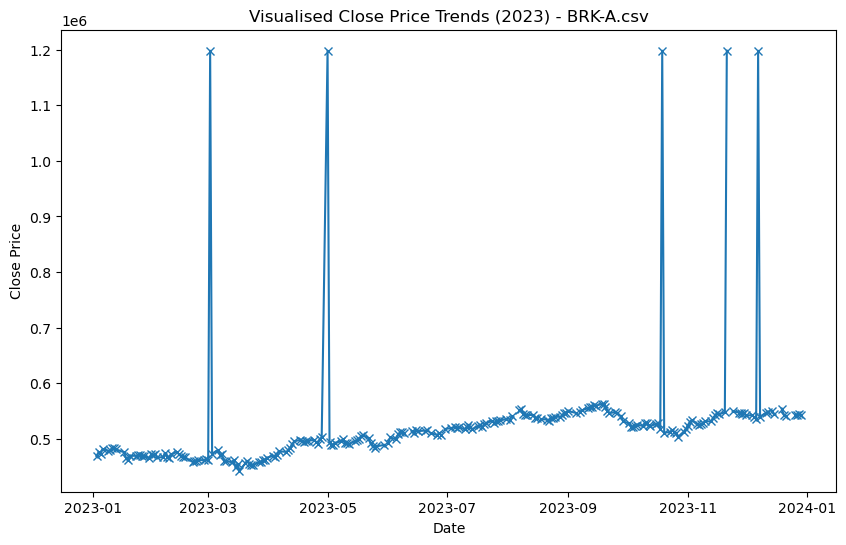

File: DNUT.csv


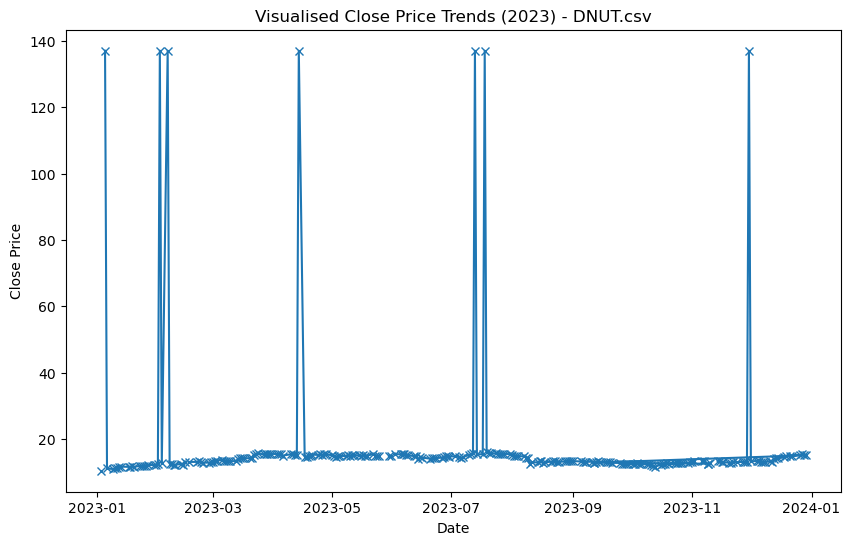

File: DPZ.csv


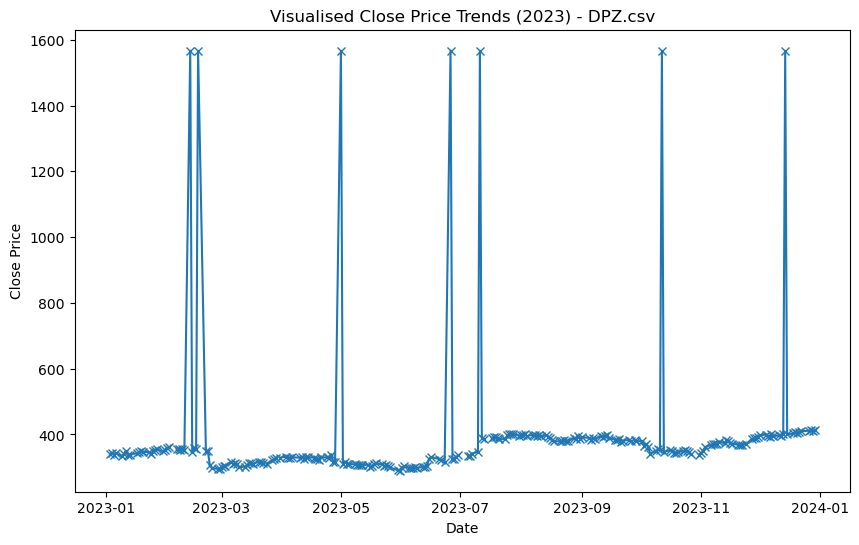

File: LKNCY.csv


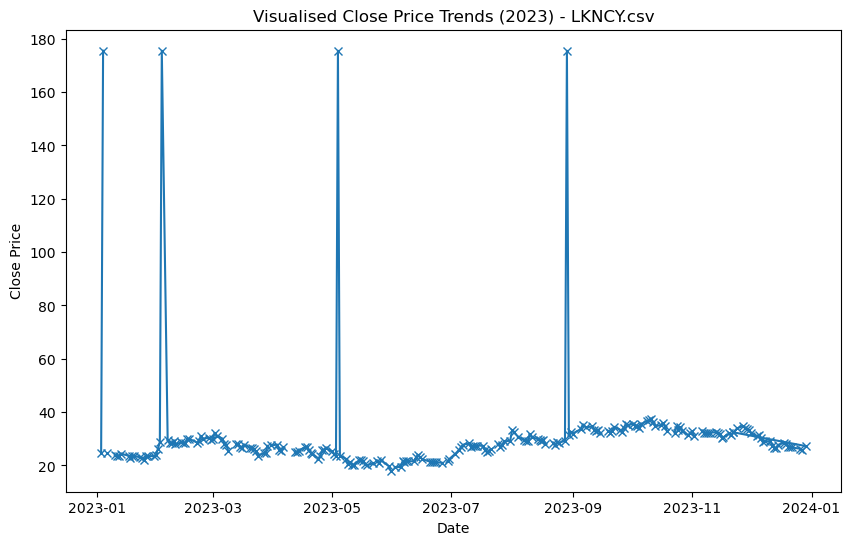

File: MCD.csv


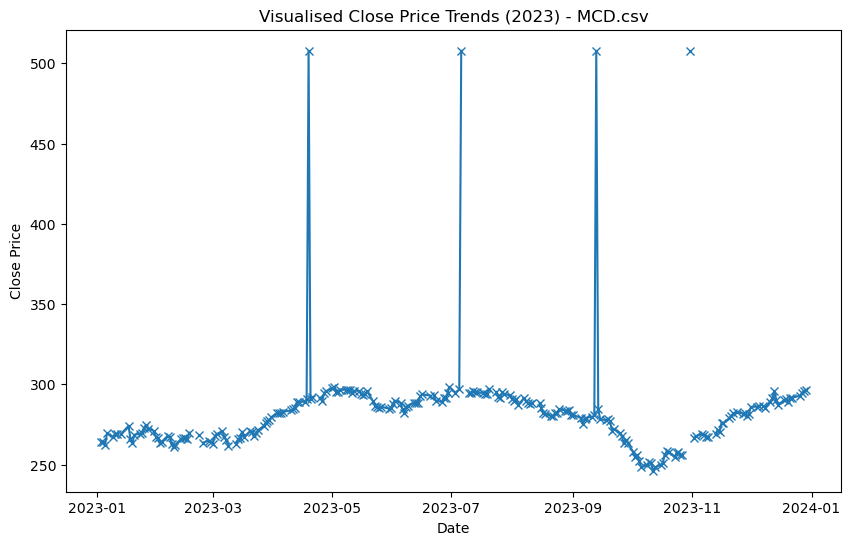

File: PZZA.csv


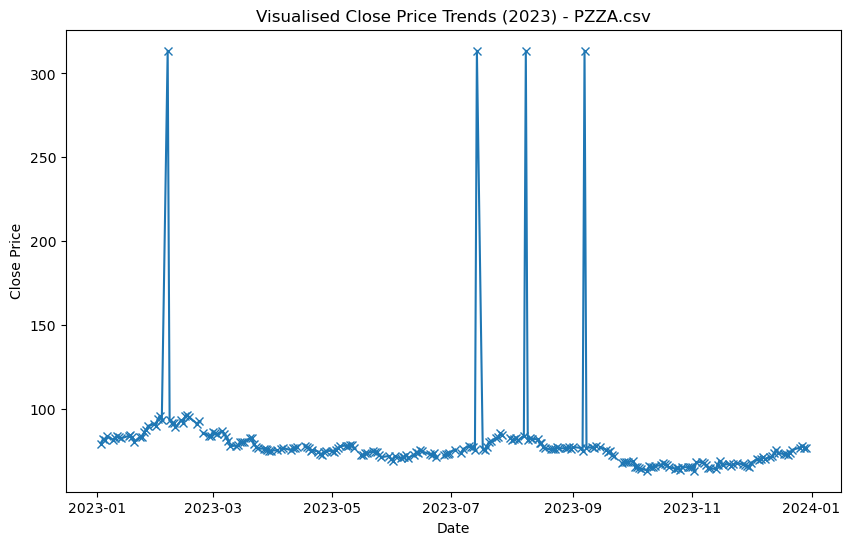

File: QSR.csv


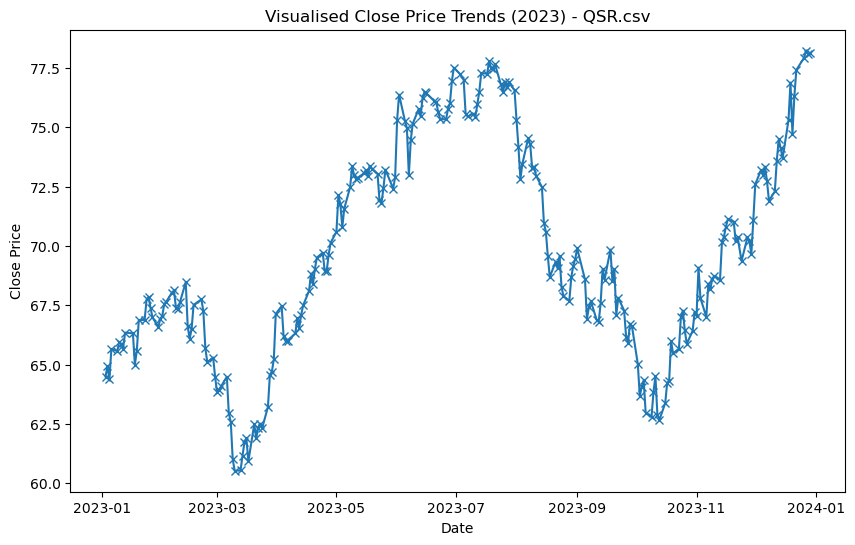

File: SBUX.csv


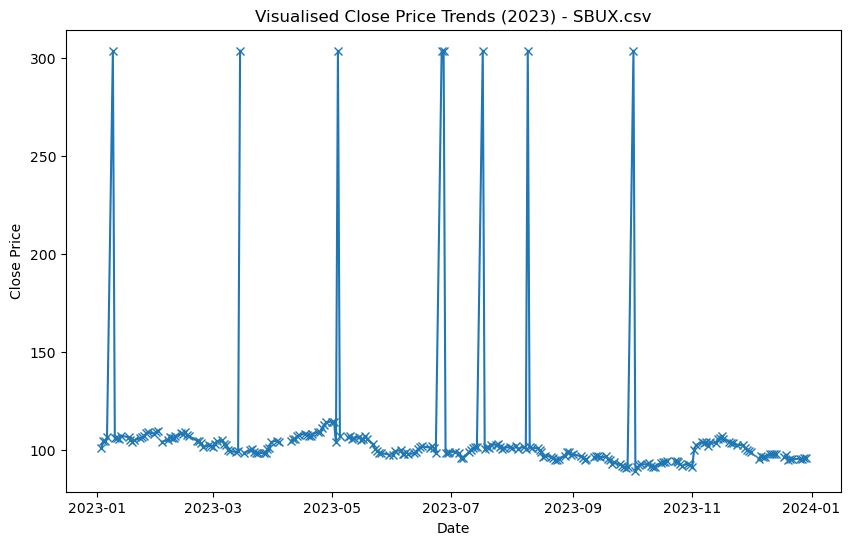

File: WEN.csv


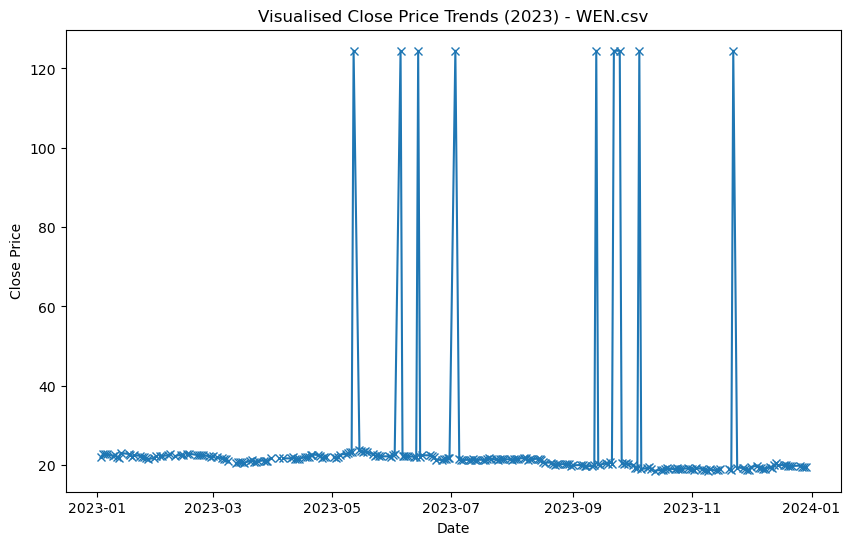

File: YUM.csv


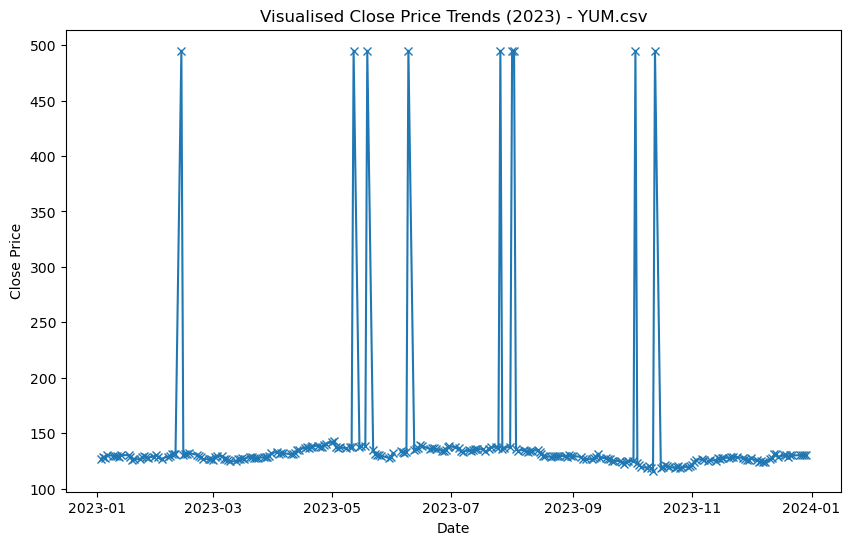

In [33]:
for file in os.listdir(datasets):
    df = pd.read_csv(os.path.join(datasets, file))      # Same code to cycle through the files, as before

    df['Date'] = pd.to_datetime(df['Date'])
    year_2023 = df[df['Date'].dt.year == 2023]

    print(f"File: {file}")
    plt.figure(figsize=(10, 6))
    plt.plot(year_2023['Date'], year_2023['Close'], label=f'{file} Close Price', marker='x')
    plt.title(f'Visualised Close Price Trends (2023) - {file}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.show()


### 3: For each company, find the day with the highest Close price and display it alongside the price.

In [4]:
for file in os.listdir(datasets):   # Loop through the files
    df = pd.read_csv(os.path.join(datasets, file)) 

    print(f"File: {file}")

    # Find the maximum Close price
    max_close_price = df["Close"].max()

    pattern = r"^(.*)(?=\.csv$)"
    match = re.match(pattern, file)
    if match:
        name = match.group()
        print(f'Max close price for {name}: {max_close_price}')

    # Display days with highest Close price 
    df = df[["Date","Close"]][df["Close"] == max_close_price]
    print(df)
    print("\n") 

File: SBUX.csv
Max close price for SBUX: 303.8577923096404
            Date       Close
19    1992-07-24  303.857792
44    1992-08-28  303.857792
60    1992-09-22  303.857792
144   1993-01-21  303.857792
149   1993-01-28  303.857792
...          ...         ...
7806  2023-06-27  303.857792
7819  2023-07-17  303.857792
7836  2023-08-09  303.857792
7873  2023-10-02  303.857792
8066  2024-07-10  303.857792

[203 rows x 2 columns]


File: DPZ.csv
Max close price for DPZ: 1566.8486330826815
            Date        Close
182   2005-04-01  1566.848633
246   2005-07-01  1566.848633
273   2005-08-10  1566.848633
464   2006-05-15  1566.848633
493   2006-06-26  1566.848633
...          ...          ...
4891  2023-12-14  1566.848633
4947  2024-03-07  1566.848633
4961  2024-03-27  1566.848633
5041  2024-07-23  1566.848633
5058  2024-08-15  1566.848633

[127 rows x 2 columns]


File: MCD.csv
Max close price for MCD: 507.8566813095628
             Date       Close
39     1966-08-29  507.856681
88    

### 4: Group the data by month and calculate the average Close price for each company. Plot these monthly averages for 3 companies and compare them. Justify the chart selection.

In [5]:
i = 0 # Counter
monthly_averages = []   # Initialize an empty list to store monthly averages for plotting
labels = []  # List to store company names

for file in os.listdir(datasets):                       # We loop through the files
    df = pd.read_csv(os.path.join(datasets, file)) 
    
    pattern = r"^(.*)(?=\.csv$)"
    match = re.match(pattern, file)
    if match:
        name = match.group()
        print(f'{name} Average Close Price')

    # Convert date to datetime object
    df['Date'] = pd.to_datetime(df['Date'])

    # Set date as index to perform time series operations
    df.set_index('Date', inplace=True)

    # Resampling the time series data based on months
    # Apply on stock close price  
    # 'ME' standards for month end
    monthly_avg = df.Close.resample('ME').mean()
    print(monthly_avg)
    print("\n") 

    # Counter to store first three monthly average datasets for plotting
    if i < 3:
        i += 1
        monthly_averages.append(monthly_avg)
        labels.append(name)
    else: 
        break

SBUX Average Close Price
Date
1992-06-30     0.347656
1992-07-31    14.848883
1992-08-31    15.572675
1992-09-30    14.913801
1992-10-31     0.471114
                ...    
2024-05-31    76.413334
2024-06-30    80.321053
2024-07-31    85.743082
2024-08-31    87.036667
2024-09-30    95.045384
Freq: ME, Name: Close, Length: 388, dtype: float64


DPZ Average Close Price
Date
2004-07-31     13.534286
2004-08-31     13.744500
2004-09-30     14.728095
2004-10-31     15.777500
2004-11-30     17.362000
                 ...    
2024-05-31    512.880909
2024-06-30    523.253883
2024-07-31    505.652116
2024-08-31    480.494483
2024-09-30    409.414162
Freq: ME, Name: Close, Length: 243, dtype: float64


MCD Average Close Price
Date
1966-07-31      0.259562
1966-08-31     25.604511
1966-09-30      0.185234
1966-10-31      0.170576
1966-11-30     53.611403
                 ...    
2024-05-31    266.246817
2024-06-30    256.508887
2024-07-31    254.738499
2024-08-31    278.598567
2024-09-30    291

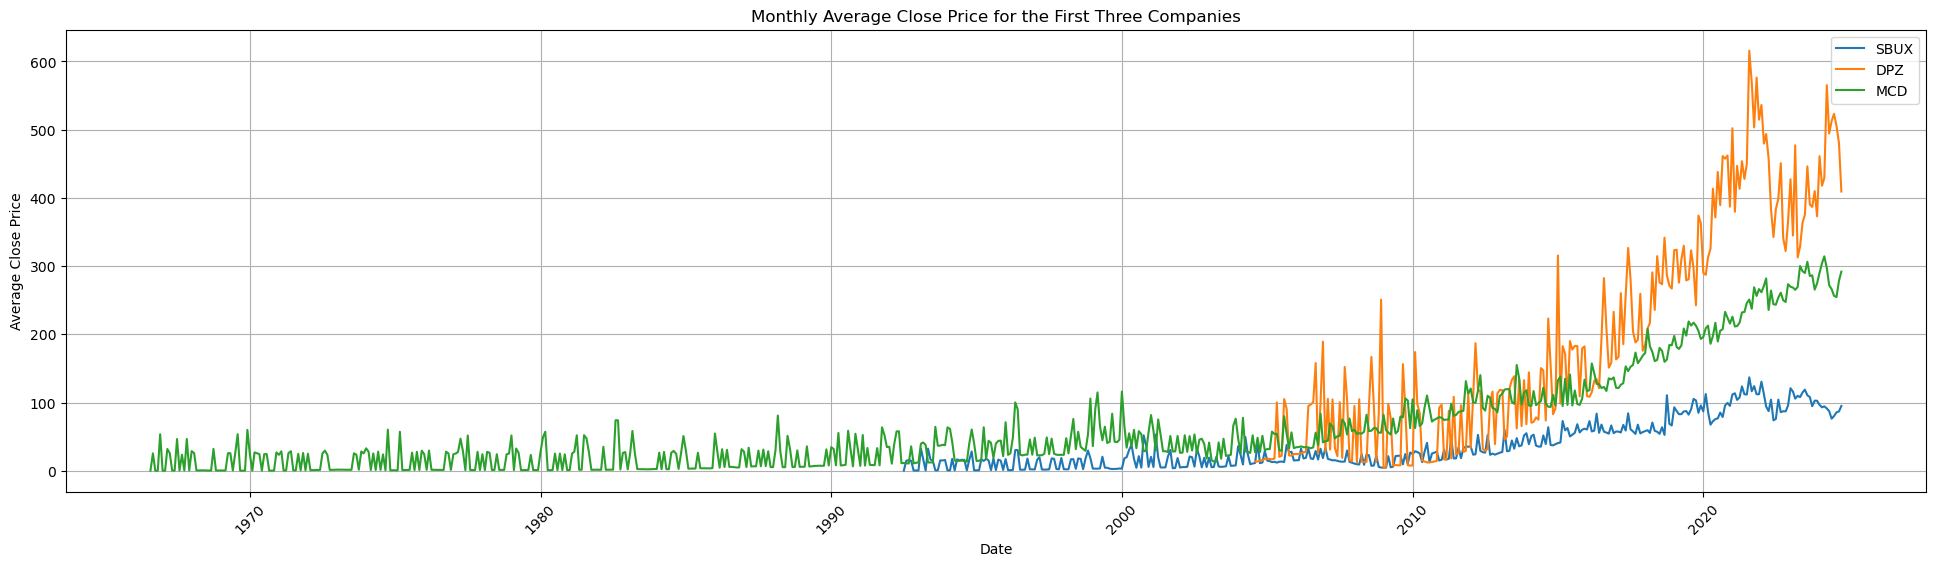

In [6]:
plt.figure(figsize=(24, 6))

# iterate through list to plot each company's monthly average
for i, monthly_avg in enumerate(monthly_averages):
    plt.plot(monthly_avg.index, monthly_avg, label=labels[i])

plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.title('Monthly Average Close Price for the First Three Companies')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()